In [224]:
import pandas as pd 
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [225]:
df=pd.read_csv('D:\data\happiness.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [226]:
df=pd.DataFrame(data=df)

In [227]:
df.shape

(158, 12)

In [228]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [230]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

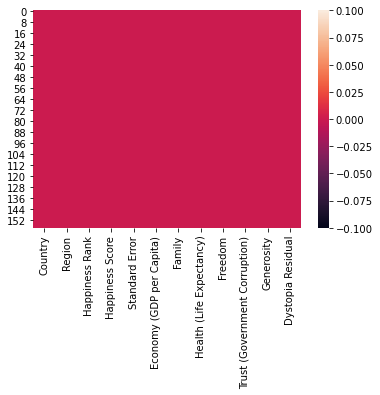

In [231]:
sns.heatmap(df.isnull())

The heatmap shows no null data is present in the Dataset.

In [232]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [233]:
df.groupby(df['Region']).describe(include='all')

Country                                     \
                                  count unique          top freq mean  std   
Region                                                                       
Australia and New Zealand             2      2  New Zealand    1  NaN  NaN   
Central and Eastern Europe           29     29   Tajikistan    1  NaN  NaN   
Eastern Asia                          6      6        Japan    1  NaN  NaN   
Latin America and Caribbean          22     22     Honduras    1  NaN  NaN   
Middle East and Northern Africa      20     20      Algeria    1  NaN  NaN   
North America                         2      2       Canada    1  NaN  NaN   
Southeastern Asia                     9      9     Thailand    1  NaN  NaN   
Southern Asia                         7      7    Sri Lanka    1  NaN  NaN   
Sub-Saharan Africa                   40     40    Swaziland    1  NaN  NaN   
Western Europe                       21     21       Cyprus    1  NaN  NaN   

                                                     ... Dystopia Residual  \
                                 min  25%  50%  75%  ...            unique   
Region                                               ...                     
Australia and New Zealand        NaN  NaN  NaN  NaN  ...               NaN   
Central and Eastern Europe       NaN  NaN  NaN  NaN  ...               NaN   
Eastern Asia                     NaN  NaN  NaN  NaN  ...               NaN   
Latin America and Caribbean      NaN  NaN  NaN  NaN  ...               NaN   
Middle East and Northern Africa  NaN  NaN  NaN  NaN  ...               NaN   
North America                    NaN  NaN  NaN  NaN  ...               NaN   
Southeastern Asia                NaN  NaN  NaN  NaN  ...               NaN   
Southern Asia                    NaN  NaN  NaN  NaN  ...               NaN   
Sub-Saharan Africa               NaN  NaN  NaN  NaN  ...               NaN   
Western Europe                   NaN  NaN  NaN  NaN  ...               NaN   

                                                                       \
                                top freq      mean       std      min   
Region                                                                  
Australia and New Zealand       NaN  NaN  2.265355  0.001563  2.26425   
Central and Eastern Europe      NaN  NaN  2.021400  0.468624  0.89991   
Eastern Asia                    NaN  NaN  1.681607  0.616479  0.65429   
Latin America and Caribbean     NaN  NaN  2.622577  0.522565  1.21305   
Middle East and Northern Africa NaN  NaN  1.980009  0.543701  0.32858   
North America                   NaN  NaN  2.480935  0.041260  2.45176   
Southeastern Asia               NaN  NaN  1.783020  0.398172  0.98195   
Southern Asia                   NaN  NaN  2.016769  0.760337  0.67108   
Sub-Saharan Africa              NaN  NaN  2.019980  0.553476  0.67042   
Western Europe                  NaN  NaN  2.151185  0.379951  1.26462   

                                                                        
                                      25%       50%       75%      max  
Region                                                                  
Australia and New Zealand        2.264803  2.265355  2.265907  2.26646  
Central and Eastern Europe       1.739330  2.025000  2.246390  3.10712  
Eastern Asia                     1.431780  1.772375  2.129935  2.32323  
Latin America and Caribbean      2.320640  2.709200  2.855148  3.60214  
Middle East and Northern Africa  1.727078  1.998595  2.293595  3.08854  
North America                    2.466347  2.480935  2.495522  2.51011  
Southeastern Asia                1.737990  1.863990  1.885410  2.31945  
Southern Asia                    1.795020  1.956370  2.396400  3.10709  
Sub-Saharan Africa               1.669332  1.950050  2.458260  3.05137  
Western Europe                   1.969610  2.123670  2.465700  2.70201  

[10 rows x 121 columns]

In [234]:
df.sort_values(by="Happiness Rank", ascending=True).head(10)                         #top 10 country in Happiness Rank

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [235]:
df.sort_values(by="Happiness Rank", ascending=True).tail(10)                      # Bottom 10 countries in Happiness Rank

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
149,Guinea,Sub-Saharan Africa,150,3.656,0.03590,0.17417,0.46475,0.24009,0.37725,0.12139,0.28657,1.99172
150,Ivory Coast,Sub-Saharan Africa,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,Burkina Faso,Sub-Saharan Africa,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,Afghanistan,Southern Asia,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [236]:
df.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


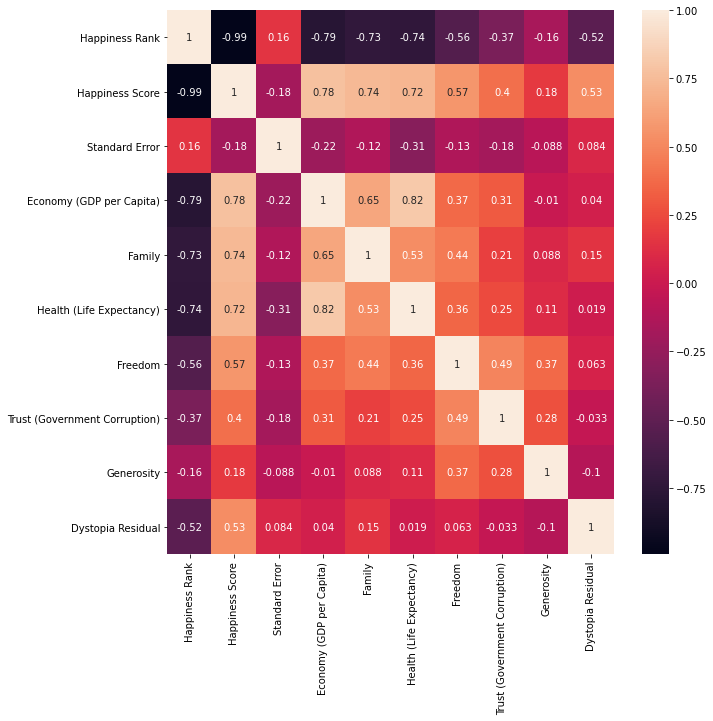

In [237]:
cor_heat=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cor_heat,annot=True)
plt.show()

'Happiness Rank' is -ve ly behaving with the data.  hence removed 

In [238]:
df.drop(['Happiness Rank','Country','Region'],axis=1,inplace=True)

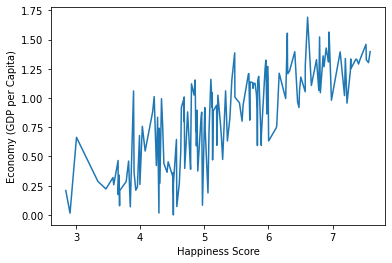

In [239]:
sns.lineplot(df['Happiness Score'],df['Economy (GDP per Capita)'])

Happiness Score shows +ve relation with Economy(GDP).i.e Linear relation hence Linear Regression is used for the data

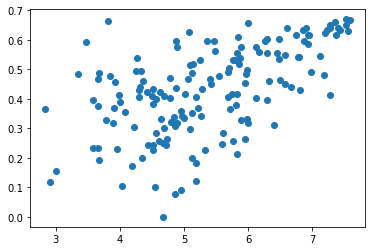

In [240]:
plt.scatter(df['Happiness Score'],df['Freedom'])

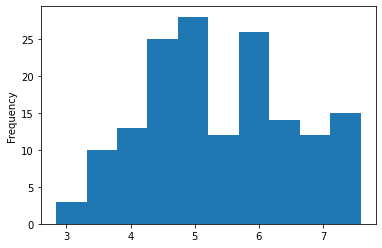

In [241]:
df['Happiness Score'].plot.hist()

Happiness Score                     AxesSubplot(0.125,0.536818;0.110714x0.343182)
Standard Error                   AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Economy (GDP per Capita)         AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Family                           AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Health (Life Expectancy)         AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Freedom                          AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Trust (Government Corruption)          AxesSubplot(0.125,0.125;0.110714x0.343182)
Generosity                          AxesSubplot(0.257857,0.125;0.110714x0.343182)
Dystopia Residual                   AxesSubplot(0.390714,0.125;0.110714x0.343182)
dtype: object

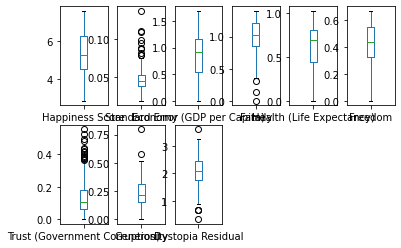

In [242]:
df.plot(kind='box',subplots=True,layout=(2,6))

The boxplot shows outliers are present in the data.

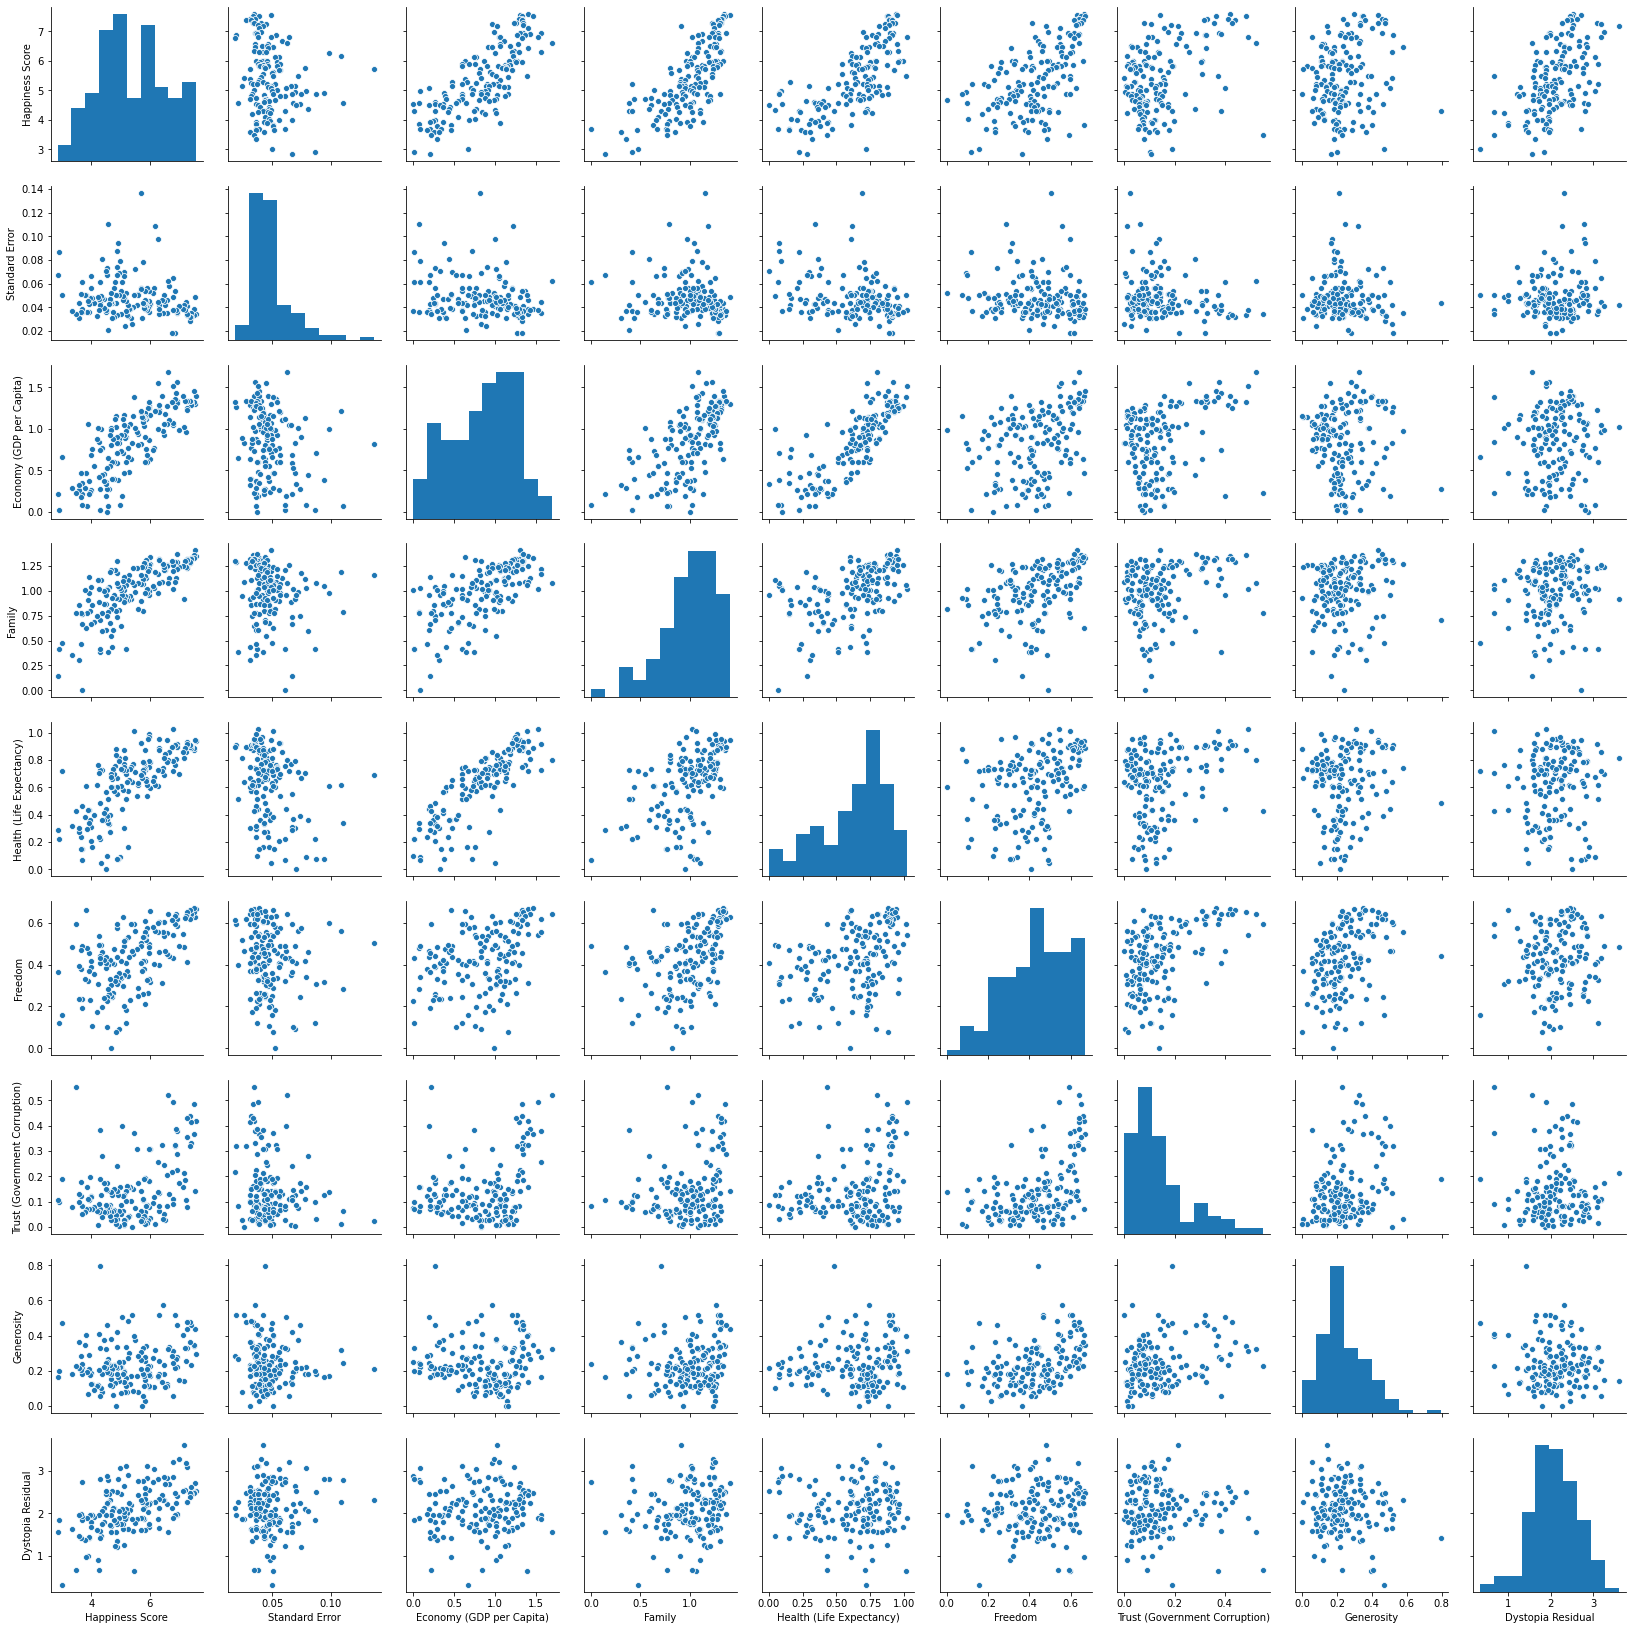

In [243]:
sns.pairplot(df)

In [244]:
df.skew()

Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

The pairplot shows some data showing -ve relation & some are showing +ve relation.Skewness is present in the data.

In [296]:
from scipy.stats import zscore

In [246]:
z=np.abs(zscore(df))
z

array([[1.93736005, 0.80592569, 1.36962124, ..., 2.30965159, 0.47103971,
        0.75825809],
       [1.91458063, 0.05588945, 1.13522625, ..., 0.01647953, 1.57585637,
        1.09285682],
       [1.88479215, 0.8544869 , 1.19286069, ..., 2.8427738 , 0.8242928 ,
        0.71233526],
       ...,
       [2.0761992 , 0.13253425, 0.45524543, ..., 0.38141902, 1.85689094,
        3.20843049],
       [2.1646885 , 2.26396166, 2.06756644, ..., 0.35771452, 0.31694987,
        0.48198451],
       [2.22251319, 1.13418227, 1.58633379, ..., 0.30180313, 0.5581534 ,
        0.96361241]])

In [247]:
thresold=3
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([6, 1, 1, 1, 7, 3, 6, 8, 3], dtype=int64))


In [248]:
df=df[(z<3).all(axis=1)]

Outliers are removed from the data

In [249]:
df.shape

(149, 9)

In [250]:
x=df.drop(['Happiness Score'],axis=1)
x

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
150,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [251]:
y=df['Happiness Score']
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
150    3.655
151    3.587
152    3.575
154    3.340
156    2.905
Name: Happiness Score, Length: 149, dtype: float64

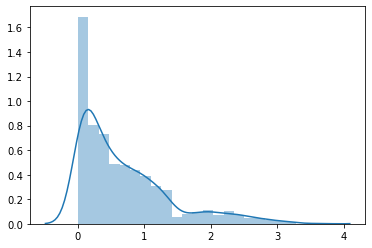

In [252]:
sns.distplot(x)

In [253]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

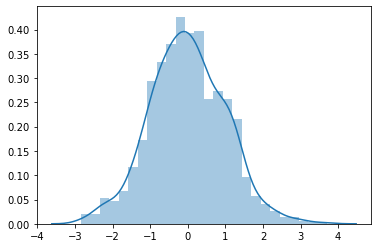

In [254]:
sns.distplot(x)                                                          # to normalised the data

In [255]:
x=pd.DataFrame(data=x)
x

,0,1,2,3,4,5,6,7
0,-0.866786,1.381916,1.357879,1.235390,1.583704,2.472255,0.546305,0.756876
1,0.185669,1.138324,1.567882,1.261541,1.338953,0.009247,1.713898,1.109300
2,-0.926089,1.198220,1.401974,0.962900,1.476027,3.036747,0.919630,0.708507
3,-0.531687,1.543526,1.283947,1.006023,1.611371,1.987759,0.966495,0.657485
4,-0.765327,1.200315,1.250726,1.089333,1.366887,1.673965,1.896418,0.631620
...,...,...,...,...,...,...,...,...
144,0.369294,-1.026255,-0.945943,-1.985941,0.274090,0.343483,-0.249803,-1.343100
145,-0.214450,-1.562163,-0.624365,-1.498813,-0.216276,-0.106943,-0.117411,-1.252030
146,-1.100427,-1.402596,-2.811354,-1.367851,-1.285662,-0.382420,1.118051,-0.322135
147,-0.691734,-1.488379,-2.608163,-1.303594,0.379439,-0.533653,-0.409226,-0.930702


In [256]:
x.shape

(149, 8)

In [257]:
y.shape

(149,)

In [258]:
max_r_score=0;
for r in range (0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=r)
    lm=LinearRegression()
    lm.fit(x_train,y_train) 
    pred=lm.predict(x_test)
    r2=r2_score(y_test,pred)
    print('r2 score for random state:',r,"is:",r2)
    if r2> max_r_score:
        max_r_score=r2;
        final_r_state=r;
print('max r2 score for random state:',final_r_state,"is:",max_r_score)

r2 score for random state: 0 is: 0.9999999269690532
r2 score for random state: 1 is: 0.9999999040783475
r2 score for random state: 2 is: 0.9999999424437156
r2 score for random state: 3 is: 0.9999999176654828
r2 score for random state: 4 is: 0.9999999464974813
r2 score for random state: 5 is: 0.9999999330213336
r2 score for random state: 6 is: 0.9999999132757342
r2 score for random state: 7 is: 0.9999998929084689
r2 score for random state: 8 is: 0.9999999506659051
r2 score for random state: 9 is: 0.9999999183021895
r2 score for random state: 10 is: 0.9999999068004832
r2 score for random state: 11 is: 0.9999999277050869
r2 score for random state: 12 is: 0.9999999338197946
r2 score for random state: 13 is: 0.9999999393011796
r2 score for random state: 14 is: 0.9999999221614346
r2 score for random state: 15 is: 0.9999999132632568
r2 score for random state: 16 is: 0.9999999269050792
r2 score for random state: 17 is: 0.9999999224373821
r2 score for random state: 18 is: 0.9999999244526693
r2 

In [259]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=33)

In [260]:
x_train.shape

(116, 8)

In [261]:
x_test.shape

(33, 8)

In [262]:
y_train.shape

(116,)

In [263]:
y_test.shape

(33,)

In [264]:
lm=LinearRegression()

In [265]:
lm.fit(x_train,y_train) 

LinearRegression()

In [266]:
pred=lm.predict(x_test)

In [267]:
lm.score(x_train,y_train)

0.9999999376218629

In [268]:
lm.coef_

array([1.09905114e-06, 3.86723362e-01, 2.51026682e-01, 2.45078226e-01,
       1.50346344e-01, 1.12983859e-01, 1.19497904e-01, 5.23921394e-01])

In [269]:
lm.intercept_

5.429602944068141

In [270]:
print('errors:')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_squared_error(y_test,pred))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

errors:
Mean absolute error: 0.0002879239812332896
Mean squared error: 1.0611879435304195e-07
Root mean squared error: 0.00032575879781372285


In [271]:
r2_score(y_test,pred)

0.9999999241327037

In [272]:
from sklearn.ensemble import RandomForestRegressor    

In [273]:
rf=RandomForestRegressor(n_estimators=100,random_state=42)

In [274]:
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [275]:
predrf=rf.predict(x_test)

In [276]:
rf.score(x_train,y_train)

0.987498765294331

In [277]:
print('errors:')
print('Mean absolute error:',mean_absolute_error(y_test,predrf))
print('Mean squared error:',mean_squared_error(y_test,predrf))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,predrf)))

errors:
Mean absolute error: 0.2902175757575755
Mean squared error: 0.15148841655151477
Root mean squared error: 0.3892151288831342


In [278]:
r2_score(y_test,predrf)

0.8916966909453632

In [279]:
from sklearn.tree import DecisionTreeRegressor

In [280]:
dtr=DecisionTreeRegressor(criterion='mse')

In [281]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [282]:
preddtr=dtr.predict(x_test)

In [283]:
dtr.score(x_train,y_train)

1.0

In [284]:
r2_score(y_test,preddtr)

0.7144479253785658

In [285]:
from sklearn.model_selection import GridSearchCV

In [286]:
from sklearn.svm import SVR

In [287]:
parameters = {'kernel':('linear', 'rbf','poly'), 'C':[1, 10]}
svr=SVR()
clf = GridSearchCV(svr, parameters)
clf.fit(x,y)
GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf','poly')},cv=5)
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [288]:
print(clf.best_params_)

{'C': 1, 'kernel': 'linear'}


In [289]:
svr=SVR(kernel='linear',C=1)

In [290]:
svr.fit(x_train,y_train)

SVR(C=1, kernel='linear')

In [291]:
predsvr=svr.predict(x_test)

In [292]:
svr.score(x_train,y_train)

0.9976839912030336

In [293]:
r2_score(y_test,predsvr)

0.9970613486041484

The linear Regression model shows the best r2 score i.e 0.9999. 

In [294]:
import joblib

In [295]:
joblib.dump(lm,'titanic_dataset.pkl')

['titanic_dataset.pkl']